In [1]:
import networkx as nx
from math import *
from numpy import pi

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

In [3]:
from qiskit.circuit.library import MCMT

In [4]:
from qiskit.visualization import plot_histogram

In [5]:
from qiskit import __version__
print(__version__)

1.1.1


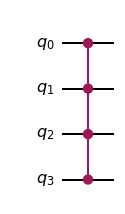

In [6]:
n=4
c4z = MCMT('cz',n-1,1)
c4z.draw('mpl')

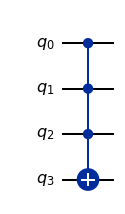

In [7]:
n=4
c4x = MCMT('cx',n-1,1)
c4x.draw('mpl')

In [8]:
# Circuito

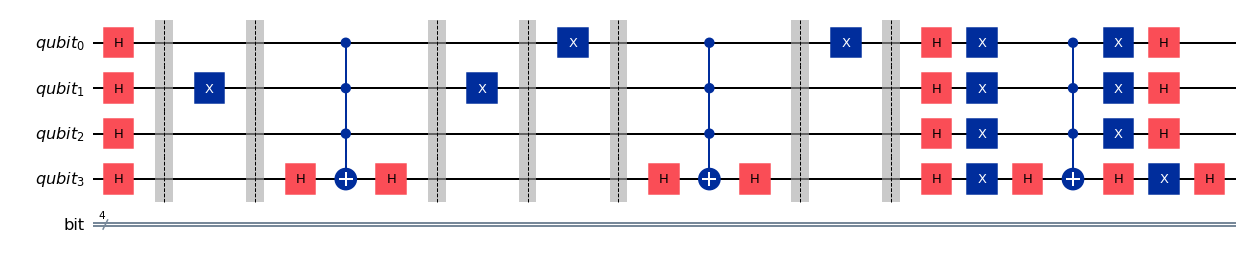

In [9]:
from qiskit import QuantumCircuit
#from qiskit.quantum_info import SparsePauliOp
#from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
#from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
n = 4
q = QuantumRegister(n, 'qubit')
c = ClassicalRegister(n, 'bit')
qc = QuantumCircuit(q, c)
 
# Add a Hadamard gate to qubit 0
#qc.x(3)

qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

#################################################################
qc.barrier(0,1,2,3)
#oracle
#qc.x(0)
qc.x(1)
#qc.x(2)
qc.barrier(0,1,2,3)
#qc.h(3)
#qc.ccx(0,1,2)
qc.h(3)
qc.compose(c4x,qubits=[0,1,2,3],inplace=True)
#qc.append(X,control(3),[0,1,2,3])
qc.h(3)
qc.barrier(0,1,2,3)
#qc.x(0)
qc.x(1)
#qc.x(2)
qc.barrier(0,1,2,3)
qc.x(0)
qc.barrier(0,1,2,3)
qc.h(3)
qc.compose(c4x,qubits=[0,1,2,3],inplace=True)
qc.h(3)
qc.barrier(0,1,2,3)
#qc.ccx(0,1,2)
#qc.h(2)
qc.x(0)

#################################################################
qc.barrier(0,1,2,3)
# difussion
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)


qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

#qc.h(2)
#qc.ccz(0,1,2)
#qc.h(2)
qc.h(3)
qc.compose(c4x,qubits=[0,1,2,3],inplace=True)
qc.h(3)


qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw('mpl')

Simulator

In [10]:
from qiskit_aer.aerprovider import AerSimulator

In [11]:
def counting_to_probability(contagem):
    m = sum(list(contagem.values()))
    n = len(list(contagem.keys())[0])
    L = [bin(i)[2:] for i in range(2**n)]
    L = list(map(lambda x: '0'*(n-len(x))+x,L))
    return {j:contagem[j]/m for j in contagem.keys()}
qc.measure(q, c)

In [12]:
#grover_circuit.measure([0,1,2,3,4],[0,1,2,3,4])
qc.measure([0,1,2,3],[0,1,2,3])
#grover_circuit.measure_q[0]
#grover_circuit.measure_q[1]

aer_sim = AerSimulator()
#pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
#isa_qc = pm.run(grover_circuit)


#aer_sim = aer.get_backend('aer_simulator')
qobj = assemble(qc, shots = 10000)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
probs = counting_to_probability(counts)
#counts

/tmp/ipykernel_7545/1125151053.py:13: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = aer_sim.run(qobj).result()


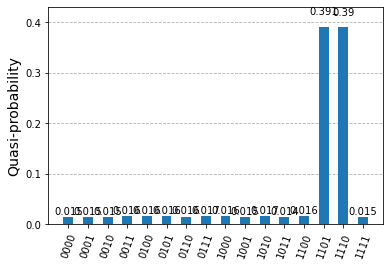

In [13]:
plot_histogram(probs)

In [14]:
sorted_probs = dict(sorted(probs.items()))
sorted_probs

{'0000': 0.0149,
 '0001': 0.015,
 '0010': 0.0152,
 '0011': 0.0161,
 '0100': 0.0163,
 '0101': 0.0161,
 '0110': 0.0155,
 '0111': 0.0168,
 '1000': 0.0159,
 '1001': 0.0152,
 '1010': 0.0166,
 '1011': 0.0145,
 '1100': 0.0165,
 '1101': 0.3909,
 '1110': 0.3896,
 '1111': 0.0149}

# Transpile 

In [41]:
compiled_circuit = transpile(qc, aer_sim, optimization_level=3)
qobj = assemble(compiled_circuit)

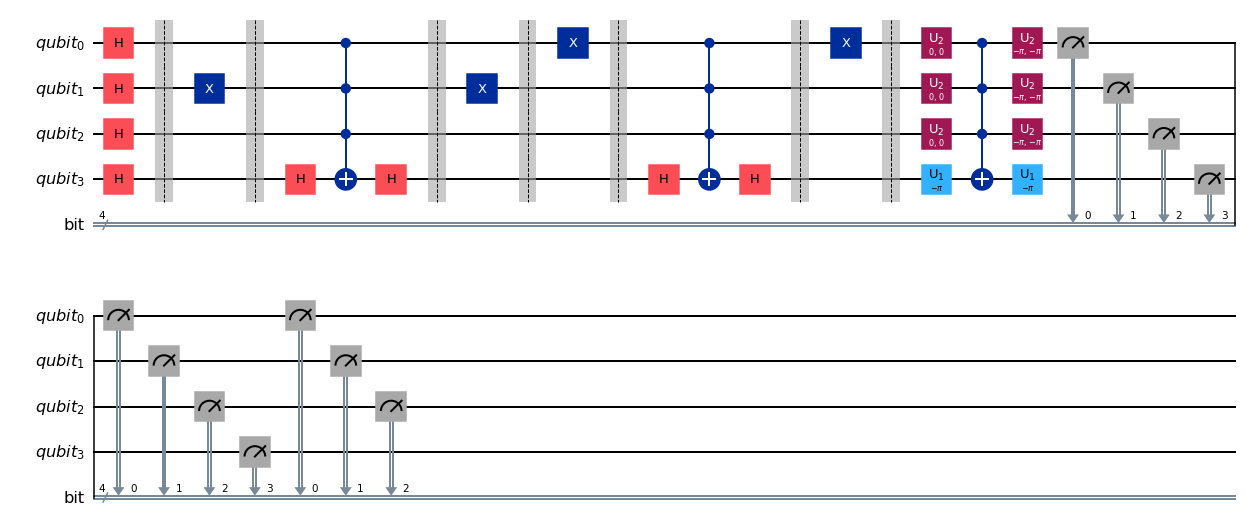

In [42]:
compiled_circuit.draw(output='mpl')

In [43]:
qobj_transpiled = assemble(compiled_circuit, shots = 10000)
result_transpiled = aer_sim.run(qobj_transpiled).result()
counts_transpiled = result.get_counts()
probs_transpiled = counting_to_probability(counts_transpiled)

/tmp/ipykernel_7673/1479529650.py:2: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result_transpiled = aer_sim.run(qobj_transpiled).result()


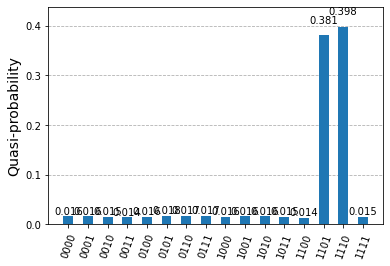

In [44]:
plot_histogram(probs_transpiled)

In [45]:
sorted_probs = dict(sorted(probs_transpiled.items()))
sorted_probs

{'0000': 0.0161,
 '0001': 0.0164,
 '0010': 0.0147,
 '0011': 0.0142,
 '0100': 0.0157,
 '0101': 0.0175,
 '0110': 0.0173,
 '0111': 0.0168,
 '1000': 0.0156,
 '1001': 0.0164,
 '1010': 0.0165,
 '1011': 0.0151,
 '1100': 0.0139,
 '1101': 0.3812,
 '1110': 0.3975,
 '1111': 0.0151}